In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def grid(n, prob):
    """
    Construct a grid with dimension n with probability prob
    
    Parameters
    -----------------------------------------------
    n(int): size of matrix
    prob(float): probability of getting 1 or 0 on grid (0<=prob<=1)

    """
    return np.random.choice([0, 1], size=(n, n), p=[1-prob, prob])

In [7]:
def monte_carlo(samples, n, prob_grid, prob_infection):
    """
    Monte Carlo simulation for a walker getting infected.

    Parameters
    -----------------------------------------------
    samples(int): number of samples
    n(int): size of matrix
    prob(float): probability of getting 1 or 0 on grid (0<=prob<=1)
    prob_infection(float): probability of the walker being infected.
    """
    count = 0.
    for _ in range(samples):        
        b = grid(n, prob_grid)
        x = np.random.randint(0,n)
        y = np.random.randint(0,n)        
        b[x,y] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):                  
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    break

                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True

                elif b[i+1, j] == 1:
                    if np.random.rand() > prob_infection:
                        stop = True
                        break

                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True

                elif b[i, j+1] == 1:
                    if np.random.rand() > prob_infection:
                        stop = True
                        break

                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True

                elif b[i-1, j] == 1:
                    if np.random.rand() > prob_infection:
                        stop = True
                        break

                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
                
                elif b[i, j-1] == 1:                    
                    if np.random.rand() > prob_infection:
                        stop = True
                        break
                
            if not change:
                stop = True
        
    return count / samples

In [8]:
def simulation(samples,n_matrix,n_prob,prob_inf):
    """
    Run simulation for various probabilities.

    Parameters
    -----------------------------------------------
    samples(int): Number of samples (int)
    n_matrix(int): Size of matrix (odd int)
    n_prob(int): How many points between 0 and 1
    prob_infection(float): probability of the walker being infected.
    
    """
    prob = np.linspace(0.,1.,n_prob)
    f = np.zeros(len(prob))
    for i,val in enumerate(prob):
        f[i] = monte_carlo(samples,n_matrix,val,prob_inf)
    plt.plot(prob,f, 'o')    
    plt.xlabel('Probability of infected individuals on grid')
    plt.ylabel('Fraction of percolated')
    plt.show()

In [25]:
#Parametros
samples = 100
n = 30
n_prob = 10
prob_inf = 0.5

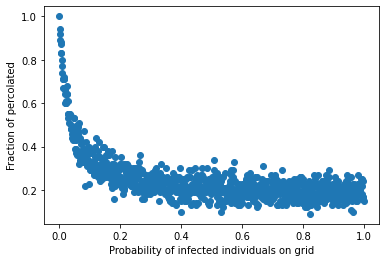

In [24]:
simulation(samples,n,1000,prob_inf)